<a href="https://colab.research.google.com/github/amsha16/MachineLearningTF/blob/master/1_IRIS_Dense.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Base Imports

In [0]:
import os
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [2]:
print(tf.__version__)

2.2.0


Import and parse IRIS Dataset

In [3]:
train_dataset_url = "https://storage.googleapis.com/download.tensorflow.org/data/iris_training.csv"
train_dataset_fp = tf.keras.utils.get_file(fname=os.path.basename(train_dataset_url), origin=train_dataset_url)


8192/2194 [================================================================================================================] - 0s 0us/step


###Check data


The first four fields are features: these are the characteristics of an example. Here, the fields hold float numbers representing flower measurements.

The last column is the label: this is the value we want to predict. For this dataset, it's an integer value of 0, 1, or 2 that corresponds to a flower name.
    
*   0: Iris setosa
*   1: Iris versicolor
*   2: Iris virginica 

In [13]:
!head -n10 {train_dataset_fp}

120,4,setosa,versicolor,virginica
6.4,2.8,5.6,2.2,2
5.0,2.3,3.3,1.0,1
4.9,2.5,4.5,1.7,2
4.9,3.1,1.5,0.1,0
5.7,3.8,1.7,0.3,0
4.4,3.2,1.3,0.2,0
5.4,3.4,1.5,0.4,0
6.9,3.1,5.1,2.3,2
6.7,3.1,4.4,1.4,1


In [0]:
column_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']
feature_names = column_names[:-1]
label_name = column_names[-1]

In [16]:
print("Features: {}".format(feature_names))
print("Label: {}".format(label_name))

Features: ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
Label: species


In [0]:
class_names = ['Iris setosa', 'Iris versicolor', 'Iris virginica']

###Creating Dataset
Default behavior is to shuffle the data (shuffle=True, huffle_buffer_size=10000), and repeat the dataset forever (num_epochs=None)!

In [0]:
batch_size = 32
train_dataset = tf.data.experimental.make_csv_dataset(train_dataset_fp, batch_size,
    column_names=column_names,
    label_name=label_name,
    num_epochs=1)

Here is a batch of features

In [20]:
features, labels = next(iter(train_dataset))
print(features)
print(labels)

OrderedDict([('sepal_length', <tf.Tensor: shape=(32,), dtype=float32, numpy=
array([6.1, 5. , 5.1, 5.7, 6.1, 4.9, 6.3, 5.5, 4.6, 5. , 4.8, 6.1, 5.4,
       6.3, 4.6, 4.9, 7.7, 6.8, 7.2, 4.9, 4.8, 6.3, 6.3, 6.7, 5. , 6.9,
       4.5, 7.7, 4.9, 4.8, 5.6, 5.8], dtype=float32)>), ('sepal_width', <tf.Tensor: shape=(32,), dtype=float32, numpy=
array([2.8, 2.3, 3.7, 3. , 3. , 3.1, 3.3, 2.6, 3.6, 3.2, 3. , 2.9, 3.9,
       2.7, 3.1, 2.4, 2.8, 3.2, 3.2, 2.5, 3.4, 3.4, 3.3, 3.1, 3.4, 3.1,
       2.3, 3. , 3.1, 3. , 2.9, 2.8], dtype=float32)>), ('petal_length', <tf.Tensor: shape=(32,), dtype=float32, numpy=
array([4. , 3.3, 1.5, 4.2, 4.9, 1.5, 4.7, 4.4, 1. , 1.2, 1.4, 4.7, 1.7,
       4.9, 1.5, 3.3, 6.7, 5.9, 6. , 4.5, 1.6, 5.6, 6. , 4.4, 1.6, 5.1,
       1.3, 6.1, 1.5, 1.4, 3.6, 5.1], dtype=float32)>), ('petal_width', <tf.Tensor: shape=(32,), dtype=float32, numpy=
array([1.3, 1. , 0.4, 1.2, 1.8, 0.1, 1.6, 1.2, 0.2, 0.2, 0.1, 1.4, 0.4,
       1.8, 0.2, 1. , 2. , 2.3, 1.8, 1.7, 0.2, 2.4, 2.5, 1.4,

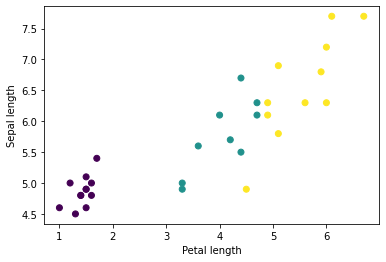

In [21]:
plt.scatter(features['petal_length'],
            features['sepal_length'],
            c=labels,
            cmap='viridis')

plt.xlabel("Petal length")
plt.ylabel("Sepal length")
plt.show()

Below is a function to repackage the features dictionary into a single array with shape: (batch_size, num_features)

In [0]:
def pack_features_vector(features, labels):
  """Pack the features into a single array."""
  features = tf.stack(list(features.values()), axis=1)
  return features, labels

Call the OOTB Map method to pack pairs of features and labels

In [0]:
train_dataset = train_dataset.map(pack_features_vector)

In [25]:
features, labels = next(iter(train_dataset))
print(features[:10])
print(labels[:10])

tf.Tensor(
[[6.1 2.6 5.6 1.4]
 [6.3 2.7 4.9 1.8]
 [5.9 3.  5.1 1.8]
 [5.8 4.  1.2 0.2]
 [4.8 3.  1.4 0.3]
 [5.7 4.4 1.5 0.4]
 [5.6 2.5 3.9 1.1]
 [6.4 3.1 5.5 1.8]
 [5.5 2.4 3.8 1.1]
 [6.2 2.2 4.5 1.5]], shape=(10, 4), dtype=float32)
tf.Tensor([2 2 2 0 0 0 1 2 1 1], shape=(10,), dtype=int32)


Choose a Model

In [0]:
model = Sequential()
model.add(Dense(10, activation='relu', input_shape=(4,)))
model.add(Dense(10, activation ='relu'))
model.add(Dense(3))

Let's have a quick look at what this model does to a batch of features-
Notice that, each example returns a logit for each class

In [29]:
predictions = model(features)
predictions[:5]

<tf.Tensor: shape=(5, 3), dtype=float32, numpy=
array([[ 0.15616804, -0.00290386,  0.4226241 ],
       [ 0.11934564, -0.01112357,  0.50094557],
       [ 0.20380859,  0.01480029,  0.35050026],
       [-0.35132346,  0.04139806,  1.2130456 ],
       [-0.25548413,  0.00736232,  0.9429316 ]], dtype=float32)>

To convert these logits to a probability for each class, use the softmax function

In [30]:
tf.nn.softmax(predictions[:5])

<tf.Tensor: shape=(5, 3), dtype=float32, numpy=
array([[0.31662953, 0.27006438, 0.41330606],
       [0.2991943 , 0.26259792, 0.43820778],
       [0.33492124, 0.277241  , 0.38783777],
       [0.13772844, 0.20397665, 0.6582949 ],
       [0.1780789 , 0.23161423, 0.5903069 ]], dtype=float32)>

Using the tf.argmax across classes gives the predicted class index. 

In [31]:
print("Prediction: {}".format(tf.argmax(predictions, axis=1)))
print("    Labels: {}".format(labels))

Prediction: [2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2]
    Labels: [2 2 2 0 0 0 1 2 1 1 0 1 2 0 1 0 1 2 1 2 0 1 1 2 1 1 2 0 1 0 2 1]


##Training the model

Define the loss and gradient function

In [0]:
loss_object = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

In [34]:
def loss(model, x, y, training):
  # training=training is needed only if there are layers with different
  # behavior during training versus inference (e.g. Dropout).
  y_ = model(x, training=training)

  return loss_object(y_true=y, y_pred=y_)


l = loss(model, features, labels, training=False)
print("Loss test: {}".format(l))


Loss test: 1.3460947275161743


In [0]:
optimizer = tf.keras.optimizers.SGD(learning_rate=0.01)

Use the tf.GradientTape context to calculate the gradients used to optimize your model:

In [0]:
def grad(model, inputs, targets):
  with tf.GradientTape() as tape:
    loss_value = loss(model, inputs, targets, training=True)
  return loss_value, tape.gradient(loss_value, model.trainable_variables)


To calculate a single optimization step:

In [36]:
loss_value, grads = grad(model, features, labels)

print("Step: {}, Initial Loss: {}".format(optimizer.iterations.numpy(),
                                          loss_value.numpy()))


Step: 0, Initial Loss: 1.3460947275161743


In [37]:
optimizer.apply_gradients(zip(grads, model.trainable_variables))

print("Step: {},         Loss: {}".format(optimizer.iterations.numpy(),
                                          loss(model, features, labels, training=True).numpy()))


Step: 1,         Loss: 1.3325846195220947


Training loop

In [38]:
train_loss_results = []
train_accuracy_results = []

num_epochs = 201

for epoch in range(num_epochs):
  epoch_loss_avg = tf.keras.metrics.Mean()
  epoch_accuracy = tf.keras.metrics.SparseCategoricalAccuracy()

  # Training loop - using batches of 32
  for x, y in train_dataset:
    # Optimize the model
    loss_value, grads = grad(model, x, y)
    optimizer.apply_gradients(zip(grads, model.trainable_variables))

    # Track progress
    epoch_loss_avg.update_state(loss_value)  # Add current batch loss
    # Compare predicted label to actual label
    # training=True is needed only if there are layers with different
    # behavior during training versus inference (e.g. Dropout).
    epoch_accuracy.update_state(y, model(x, training=True))

  # End epoch
  train_loss_results.append(epoch_loss_avg.result())
  train_accuracy_results.append(epoch_accuracy.result())

  if epoch % 50 == 0:
    print("Epoch {:03d}: Loss: {:.3f}, Accuracy: {:.3%}".format(epoch,
                                                                epoch_loss_avg.result(),
                                                                epoch_accuracy.result()))


Epoch 000: Loss: 1.322, Accuracy: 29.167%
Epoch 050: Loss: 0.469, Accuracy: 79.167%
Epoch 100: Loss: 0.296, Accuracy: 95.000%
Epoch 150: Loss: 0.207, Accuracy: 97.500%
Epoch 200: Loss: 0.147, Accuracy: 98.333%


Visualize the loss function over time

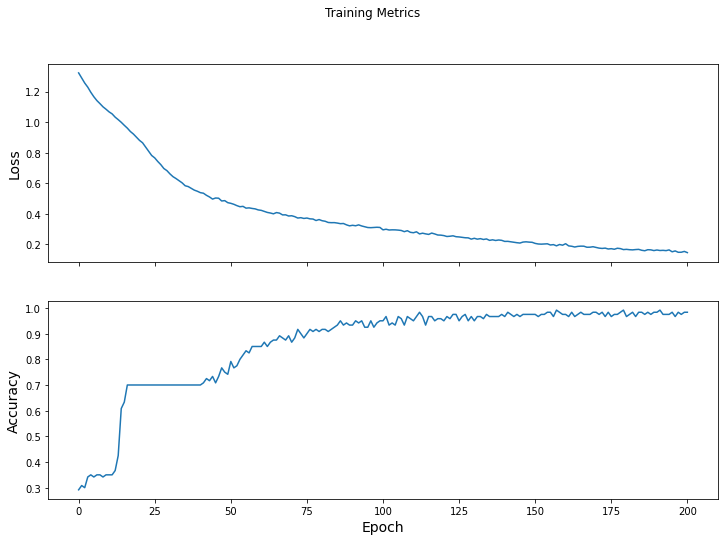

In [39]:
fig, axes = plt.subplots(2, sharex=True, figsize=(12, 8))
fig.suptitle('Training Metrics')

axes[0].set_ylabel("Loss", fontsize=14)
axes[0].plot(train_loss_results)

axes[1].set_ylabel("Accuracy", fontsize=14)
axes[1].set_xlabel("Epoch", fontsize=14)
axes[1].plot(train_accuracy_results)
plt.show()


Setup the test dataset

In [40]:
test_url = "https://storage.googleapis.com/download.tensorflow.org/data/iris_test.csv"

test_fp = tf.keras.utils.get_file(fname=os.path.basename(test_url),
                                  origin=test_url)


8192/573 [============================================================================================================================================================================================================================================================================================================================================================================================================================================] - 0s 0us/step


In [0]:
test_dataset = tf.data.experimental.make_csv_dataset(
    test_fp,
    batch_size,
    column_names=column_names,
    label_name='species',
    num_epochs=1,
    shuffle=False)

test_dataset = test_dataset.map(pack_features_vector)


Evaluate the model on the test dataset

In [42]:
test_accuracy = tf.keras.metrics.Accuracy()

for (x, y) in test_dataset:
  # training=False is needed only if there are layers with different
  # behavior during training versus inference (e.g. Dropout).
  logits = model(x, training=False)
  prediction = tf.argmax(logits, axis=1, output_type=tf.int32)
  test_accuracy(prediction, y)

print("Test set accuracy: {:.3%}".format(test_accuracy.result()))


Test set accuracy: 96.667%


In [43]:
tf.stack([y,prediction],axis=1)

<tf.Tensor: shape=(30, 2), dtype=int32, numpy=
array([[1, 1],
       [2, 2],
       [0, 0],
       [1, 1],
       [1, 1],
       [1, 1],
       [0, 0],
       [2, 2],
       [1, 1],
       [2, 2],
       [2, 2],
       [0, 0],
       [2, 2],
       [1, 1],
       [1, 1],
       [0, 0],
       [1, 1],
       [0, 0],
       [0, 0],
       [2, 2],
       [0, 0],
       [1, 1],
       [2, 2],
       [1, 2],
       [1, 1],
       [1, 1],
       [0, 0],
       [1, 1],
       [2, 2],
       [1, 1]], dtype=int32)>

Use the trained model to make predictions

In [44]:
predict_dataset = tf.convert_to_tensor([
    [5.1, 3.3, 1.7, 0.5,],
    [5.9, 3.0, 4.2, 1.5,],
    [6.9, 3.1, 5.4, 2.1]
])

# training=False is needed only if there are layers with different
# behavior during training versus inference (e.g. Dropout).
predictions = model(predict_dataset, training=False)

for i, logits in enumerate(predictions):
  class_idx = tf.argmax(logits).numpy()
  p = tf.nn.softmax(logits)[class_idx]
  name = class_names[class_idx]
  print("Example {} prediction: {} ({:4.1f}%)".format(i, name, 100*p))


Example 0 prediction: Iris setosa (97.7%)
Example 1 prediction: Iris versicolor (82.8%)
Example 2 prediction: Iris virginica (80.0%)
